Реализовать наивный поиск подстроки в строке. Построить график зависимости времени поиска случайной подстроки длины N/2 в строке длины N от N.  (1 балл)


In [181]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import random
import time
from progress.bar import Bar
from tqdm import tqdm

In [182]:
T = "aaaaabbbabbababababababababbababbbbbbbbababbbbbabababababbababab"
P1 = "aaaaabbbabba"
P2 = "babbababababa"
P3 = "babbabafbababa"
P4 = "abababbababbbbbbbbababb"
P5 = "ababbababbbbbbbbababbbbbabababababbababab"

def SearchNaive(T,P):
    for i in tqdm(range(len(T)-len(P)+1)):
        if T[i:i + len(P)] == P:
            return "Yes"
        else:
            continue
        
    return "No"

print(SearchNaive(T,P1))
print(SearchNaive(T,P2))
print(SearchNaive(T,P3))
print(SearchNaive(T,P4))
print(SearchNaive(T,P5))

  0%|          | 0/24 [00:00<?, ?it/s]

Yes
Yes
No
Yes
Yes


In [185]:
N = [n for n in range(10, 20000, 100)] 
Lengthes = []
Times = []
seed = "01"
for x in N:
    #print(x)
    M = x//2
    seq = "".join([random.choice(seed) for i in range(x)])
    #print(seq)
    subseq = "".join([random.choice(seed) for i in range(x//2)])
    #print(subseq)
    #if subseq == 1:
    #    subseq = seq[len(seq)//2:len(seq)]
        #print(subseq)
    #else:
    #    subseq = seq[0:len(seq)//2]
        #print(subseq)
    #print(subseq)
    start = time.time()
    SearchNaive(seq, subseq)
    end = time.time()
    Lengthes.append(x)
    Times.append(end-start)

100%|██████████| 9956/9956 [00:00<00:00, 1025553.58it/s]


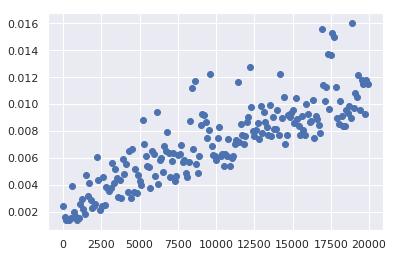

In [186]:
x, y = Lengthes, Times
plt.plot(x, y, "bo")
plt.show()

Реализовать наивный способ вычисления префикс-функции. Построить график зависимости времени построения префикс-функции от размера строки N для случайной строки (1 балл)


In [60]:
def sp(a):
    P = [0]*len(a)
    for i in range(2,len(a)):
        subs = a[0:i]
        for j in range(len(subs)):
            suf = subs[-j:]
            pref = subs[:j]
            if suf == pref:
                P[i] = j
    return P
                
T = "abbabbjjjj"
print(sp(T))

[0, 0, 0, 0, 1, 2, 3, 0, 0, 0]


In [61]:
import numpy as np
import time
import random
import sys
import matplotlib.pyplot as plt
%matplotlib inline

sys.setrecursionlimit = 10**3 #in case you use bigger test set 
seed = "ab"


test = [n for n in range(0, 2000, 10)] 
#print(test)
lengthes = []
avg_times = []
for x in test:
    #print(x)
    seq = [random.choice(seed) for i in range(x)]
    #print(rand)
    start = time.time()
    sp(seq)
    end = time.time()
    lengthes.append(len(seq))
    avg_times.append(end-start)

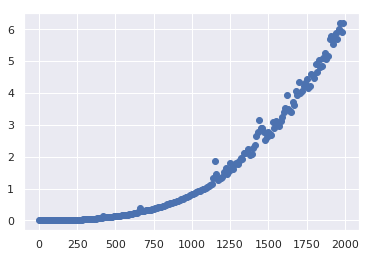

In [62]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd

x, y = lengthes, avg_times
plt.plot(x, y, "bo")
plt.show()

Реализовать динамический массив. Вы ДОЛЖНЫ использовать list фиксированного размера в своей реализации (или numpy-массивы). Просто отнаследоваться от list - не решение. Удаление элемента реализовывать необязательно. (2 балла)


In [59]:
import numpy 
  
class DynamicMassive(object): 

    def __init__(self): 
        self.count = 0
        self.size = 1
        self.A = self.make_array(self.size) 
          
    def __len__(self): 
        return self.count
    
    def size(self): 
        return self.size
      
    def __getitem__(self, k): 
        if k < 0 and k >= self.count: 
            return IndexError('Size is exceeded!')  
        return self.A[k]
          
    def append(self, elem): 
        if self.count == self.size: 
            B = self.make_array(2 * self.size) 
            for i in range(self.count):
                B[i] = self.A[i] 
            self.A = B
            self.size = 2 * self.size
          
        self.A[self.count] = elem
        self.count += 1
                    
    def make_array(self, new_cap): 
        return numpy.empty(new_cap, dtype=int, order='C')

In [60]:
mass = DynamicMassive() 
mass.append(1) 
print(mass.size)
mass.append(2) 
print(mass.size)
mass.append(3) 
print(mass.size)
mass.append(4) 
print(mass.size)
mass.append(5) 
print(mass.size)
mass.append(6) 
print(mass.size)
mass.append(7) 
print(mass.size)
mass.append(8) 
print(mass.size)
mass.append(9) 
print(mass.size)
mass.append(10) 
print(mass.size)
mass.append(11) 
print(mass.size)
mass.append(12) 
print(mass.size)
print(mass[2])

print(mass.A)

1
2
4
4
8
8
8
8
16
16
16
16
3
[                  1                   2                   3
                   4                   5                   6
                   7                   8                   9
                  10                  11                  12
 7881702260482471202 8319104481852400229 7378622672574246761
 3906644190443169331]


Реализовать вычисление префикс-функции для всего паттерна за O(N) времени. (2 балла)


In [65]:
def prefixs(p):
    sp = [0]*len(p)
    j = 0 
    for i in range(1,len(p)):
        #print('i', i)
        while j >= 0 and p[j] != p[i]:
            if j-1 >= 0:
                j = sp[j-1]
            else:
                j = -1 
        j += 1
        #print("j", j)
        sp[i] = j
        
    return sp
        
#T = "aaaaabbbabbabbbbbabababababbababab"
T = "abcabc"
print(prefixs(T))

[0, 0, 0, 1, 2, 3]


Реализовать поиск всех вхождений паттерна в тексте на основе алгоритма вычисления префикс-функции (1 балл) (https://habr.com/post/307220/)


In [92]:
def prefix_search1(S,p):
    x = p + "@" + S + "$"
    sp = [0]*len(x)
    j = 0 
    for i in range(1,len(x)):
        while j >= 0 and x[j] != x[i]:
            if j-1 >= 0:
                j = sp[j-1]
            else:
                j = -1 
        j += 1
        sp[i] = j
        
    print(sp)
    out = []
    for i in range(len(sp)):
        if sp[i] == len(p):
            out.append(i-len(p)*2)
    return out

def prefix_search2(T, p):
    x = p + '@' + T + '$'
    print(p)
    i = 1
    j = 0
    sp = [0]*(len(x)-1)
    while x[i] != '$':
        while (j > 0) and (x[i] != x[j]):
            j = sp[j-1]
        if x[i] == x[j]:
            j += 1
        sp[i] = j
        i += 1
    print(sp)
    out = []
    for i in range(len(sp)):
        
        if sp[i] == len(p):
            #print(i)
            out.append(i-len(p)*2)
    return out

S="abcabccab"
p="abc"
print(prefix_search1(S,p))
print(prefix_search2(S,p))

[0, 0, 0, 0, 1, 2, 3, 1, 2, 3, 0, 1, 2, 0]
[0, 3]
abc
[0, 0, 0, 0, 1, 2, 3, 1, 2, 3, 0, 1, 2]
[0, 3]


Реализовать классический алгоритм Кнута-Морриса-Пратта (вычисление префикс функции паттерна и использование ее в ходе поиска в тексте раздельно) (1 балл)


In [78]:
def prefixs(p):
    sp = [0]*len(p)
    j = 0 
    for i in range(1,len(p)):
        #print('i', i)
        while j >= 0 and p[j] != p[i]:
            if j-1 >= 0:
                j = sp[j-1]
            else:
                j = -1 
        j += 1
        #print("j", j)
        sp[i] = j
    #print(sp)
    return sp


def find_intersections(S, p):
    matches = []
    f = prefixs(p)
    #print(f)
    n, m = len(S),len(p)
    #print(n, m)
    j = 0
    for i in range(n):
        #print(i)
        #print(i, S[i], p[j])
        while j >= 0 and S[i] != p[j]:
            #print(i, S[i], p[j])
            if j-1 >= 0: 
                j = f[j-1]
            else: 
                j = -1
        j += 1  
        #print("j", j)
        if j == m:
            j = f[m - 1]
            #print("j", j)
            matches.append(i - m + 1)
            #print(matches)
    return matches

S = "abcabcabcab"
p = "abcabcab"
find_intersections(S, p)

[0, 0, 0, 1, 2, 3, 4, 5]
j 5
[0]
j 5
[0, 3]


[0, 3]

Реализовать алгоритм Рабина-Карпа (простую версию, разобранную на лекции) (1 балл)


In [179]:
def make_hash(string):
    d = {"a":1, "t":2, "g":3, "c":4}
    out = 0
    #print(list(string))
    for i in list(string):
        #print(i)
        out = out*10 + d[i]
    #print("make_hash", string, out)
    return int(out)


def rabin_karp(P, T):
    if len(P) > len(T) or len(P) == 0 or len(T) == 0:
        return -1
    
    pattern_hash = make_hash(P)
    #print("pattern_hash is", pattern_hash, P)
    text_hash = make_hash(T[0:len(P)])
    #print("text_hash is", text_hash, T[0:len(P)])
    f = []
    if text_hash == pattern_hash:
        f.append(0)
    for i in range(1, len(T) - len(P) + 1):
        #print(i)
        #print(T, T[len(P) + i -1])
        text_hash = text_hash % (10 ** (len(P) - 1)) * 10 + make_hash(T[len(P) + i -1])
        #print(pattern_hash, text_hash)
        if text_hash == pattern_hash:
            f.append(i)
    return f

print("Out is", rabin_karp("ct", "actgc"))
print("Out is", rabin_karp("ac", "actgc"))
print("Out is", rabin_karp("ctg", "actgc"))
print("Out is", rabin_karp("tg", "actgc"))
print("Out is", rabin_karp("ctgc", "actgc"))
print("Out is", rabin_karp("actgc", "actgcactgc"))
print("Out is", rabin_karp("a", "actgca"))
print("Out is", rabin_karp("actgcaactgcaactgcaactgca", "actgca"))
print("Out is", rabin_karp("ctgctgctg", "actgca"))
print("Out is", rabin_karp("ctg", "actgca"))
print("Out is", rabin_karp("ac", "actgca"))

Out is [1]
Out is [0]
Out is [1]
Out is [2]
Out is [1]
Out is [0, 5]
Out is [0, 5]
Out is -1
Out is -1
Out is [1]
Out is [0]
